# Final Project Capstone : Comparing Cities - Final

I'm Saiid MANSOURI AZZOUZI, from Morocco, 26 years old, I was an Electromechanical engineer, but when I've heard about data science I decided to start a new career.    Actually I'm a data engineer, I do some ingestion and transformation but I'm aiming to become a data scientist. Because I see Data science as the art of making a usefull story from data.

## Introductory section

Comparing cities is a difficult task, and to answer the question what city is more similar to a specific one is harder:
which city is more similar to New York City , paris or Toronto or another city ? 
Both cities are very diverse and are the financial capitals of their respective countries.

First we need to define in what basis we would compare our cities :
One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are.

## Methodology section

First we will extract data from New York City , Toronto , Paris. cleaning them and organizing them as used in week 3.
Then we will use clustering on New York City, we will make the clustering fit the New York Cities Avenues.
and after we will use our model in Toronto and Paris to see which city look like New York.

My code will be in form of bloc so it can be reussable and the use of another cities will be easy.

## Data Introduction

### Library importation

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
pd.options.display.max_columns = 20

Libraries imported.


## Data Loading

Data extraction has made in Final Project Capstone : Comparing Cities - Data 

In [2]:
paris_venues = pd.read_csv('paris_venues.csv')
toronto_venues = pd.read_csv('toronto_venues.csv')
new_york_venues = pd.read_csv('new_york_venues.csv')

In [3]:
print('There are {} uniques categories in new york city.'.format(len(new_york_venues['Venue Category'].unique())))

There are 428 uniques categories in new york city.


In [4]:
print('There are {} uniques categories in paris city.'.format(len(paris_venues['Venue Category'].unique())))

There are 294 uniques categories in paris city.


In [5]:
print('There are {} uniques categories in toronto city.'.format(len(toronto_venues['Venue Category'].unique())))

There are 231 uniques categories in toronto city.


### Analyze Each Neighborhood

In [6]:
def get_city_grouped(city_data):
    city_onehot = pd.concat([city_data['Neighborhood'],pd.get_dummies(city_data[['Venue Category']], prefix="", prefix_sep="").drop(columns=['Neighborhood'], errors='ignore')],axis=1)
    return city_onehot.groupby('Neighborhood').mean().reset_index()

In [7]:
toronto_grouped=get_city_grouped(toronto_venues)
new_york_grouped=get_city_grouped(new_york_venues)
paris_grouped=get_city_grouped(paris_venues)

In [8]:
from functools import reduce
print('The 3 three cities have '+ str(reduce(np.intersect1d, (paris_grouped.columns,new_york_grouped.columns,toronto_grouped.columns)).shape[0])+' avenue category in common')

print('Cities Paris and New York have '+ str(reduce(np.intersect1d, (paris_grouped.columns,new_york_grouped.columns)).shape[0])+' avenue category in common')

print('Cities Toronto and New York have '+ str(reduce(np.intersect1d, (new_york_grouped.columns,toronto_grouped.columns)).shape[0])+' avenue category in common')

print('Cities Toronto and Paris have '+ str(reduce(np.intersect1d, (paris_grouped.columns,toronto_grouped.columns)).shape[0])+' avenue category in common')

The 3 three cities have 172 avenue category in common
Cities Paris and New York have 247 avenue category in common
Cities Toronto and New York have 205 avenue category in common
Cities Toronto and Paris have 178 avenue category in common


In [9]:
toronto_grouped.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.0,0.0,0.000000
1,"Brockton , Parkdale Village , Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,Business reply mail Processing CentrE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.055556
3,"CN Tower , King and Spadina , Railway Lands , ...",0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.015873,0.0,0.0,0.0,0.0,0.0,0.015873


In [10]:
new_york_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,...,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arlington,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arrochar,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
paris_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Amérique,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.000000,0.0,0.0,0.0625,0.000000,0.00,0.0,0.0,0.0,0.0
1,Archives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.04,...,0.010000,0.0,0.0,0.0000,0.010000,0.00,0.0,0.0,0.0,0.0
2,Arsenal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.030303,0.0,0.0,0.0000,0.015152,0.00,0.0,0.0,0.0,0.0
3,Arts-et-Métiers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.02,...,0.020000,0.0,0.0,0.0300,0.050000,0.02,0.0,0.0,0.0,0.0
4,Auteuil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0.000000,0.0,0.0,0.0000,0.000000,0.00,0.0,0.0,0.0,0.0


In [12]:
all_columns=reduce(np.union1d,(paris_grouped.columns,new_york_grouped.columns,toronto_grouped.columns))

def put_all_venues_categories(data,columns):
    for col in columns:
        if col not in data.columns:
            data[col]=0

    return data


paris_prepared=put_all_venues_categories(paris_grouped,all_columns)
new_york_prepared=put_all_venues_categories(new_york_grouped,all_columns)
toronto_prepared=put_all_venues_categories(toronto_grouped,all_columns)

In [13]:
paris_prepared.head(10)

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Alsatian Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Varenyky restaurant,Veterinarian,Video Store,Volleyball Court,Warehouse Store,Waste Facility,Waterfront,Weight Loss Center,Whisky Bar,Wings Joint
0,Amérique,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,Archives,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.04,...,0,0,0,0,0,0,0,0,0,0
2,Arsenal,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,Arts-et-Métiers,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.01,0.02,...,0,0,0,0,0,0,0,0,0,0
4,Auteuil,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
5,Batignolles,0.0,0.0,0.000,0.0,0.01,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
6,Bel-Air,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
7,Belleville,0.0,0.0,0.025,0.0,0.00,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
8,Bercy,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
9,Bonne-Nouvelle,0.0,0.0,0.000,0.0,0.00,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [15]:
def city_venues_sorted(data_grouped,num_top_venues = 10):
    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))
            
    # create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = data_grouped['Neighborhood']

    for ind in np.arange(data_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_grouped.iloc[ind, :], num_top_venues)
    return neighborhoods_venues_sorted

In [16]:
paris_venues_sorted=city_venues_sorted(paris_grouped)
paris_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amérique,French Restaurant,Bus Stop,Supermarket,Park,Pool,Bakery,Plaza,Bed & Breakfast,Health Food Store,Bistro
1,Archives,French Restaurant,Hotel,Coffee Shop,Bar,Italian Restaurant,Art Gallery,Clothing Store,Bistro,Tapas Restaurant,Japanese Restaurant
2,Arsenal,French Restaurant,Hotel,Park,Plaza,Italian Restaurant,Tapas Restaurant,Boat or Ferry,Pedestrian Plaza,Cocktail Bar,Gastropub
3,Arts-et-Métiers,French Restaurant,Hotel,Cocktail Bar,Wine Bar,Italian Restaurant,Chinese Restaurant,Restaurant,Vietnamese Restaurant,Coffee Shop,Japanese Restaurant
4,Auteuil,Tennis Court,Stadium,Botanical Garden,Sporting Goods Shop,Plaza,French Restaurant,Garden,Outdoors & Recreation,Racecourse,Museum


In [17]:
toronto_venues_sorted=city_venues_sorted(toronto_grouped)
toronto_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Farmers Market,Cheese Shop,Beer Bar,Bakery,Restaurant,Café,Italian Restaurant
1,"Brockton , Parkdale Village , Exhibition Place",Café,Breakfast Spot,Coffee Shop,Bakery,Convenience Store,Pet Store,Performing Arts Venue,Climbing Gym,Stadium,Nightclub
2,Business reply mail Processing CentrE,Light Rail Station,Yoga Studio,Pizza Place,Smoke Shop,Spa,Skate Park,Auto Workshop,Park,Farmers Market,Garden Center
3,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Lounge,Airport Terminal,Airport,Harbor / Marina,Sculpture Garden,Plane,Coffee Shop,Boutique,Boat or Ferry
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Burger Joint,Salad Place,Bubble Tea Shop,Fried Chicken Joint,Middle Eastern Restaurant,Japanese Restaurant


In [18]:
new_york_venues_sorted=city_venues_sorted(new_york_grouped)
new_york_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Deli / Bodega,Cosmetics Shop,Bus Station,Supermarket,Department Store,Discount Store,Intersection,Gas Station,Pharmacy
1,Annadale,Diner,Sports Bar,Train Station,Restaurant,Pizza Place,Dance Studio,Pub,Pharmacy,Food,Garden
2,Arden Heights,Bus Stop,Pharmacy,Deli / Bodega,Coffee Shop,Pizza Place,Garden Center,Gay Bar,Gastropub,Gas Station,Gaming Cafe
3,Arlington,Bus Stop,Deli / Bodega,American Restaurant,Intersection,Grocery Store,Zoo Exhibit,Gaming Cafe,Gastropub,Gas Station,Garden Center
4,Arrochar,Bus Stop,Deli / Bodega,Italian Restaurant,Athletics & Sports,Sporting Goods Shop,Supermarket,Cosmetics Shop,Food Truck,Sandwich Place,Polish Restaurant


In [19]:
def get_final_dataset(datas,cols,cities):
    cols=['Neighborhood']+[col for col in cols if col!='Neighborhood']
    final_dataset=pd.DataFrame(columns=cols)
    for id,data in enumerate(datas):
        data['city'] = cities[id]
        final_dataset=final_dataset.append(data, ignore_index=True)
    
    return final_dataset
finaldata=get_final_dataset([paris_prepared,new_york_prepared,toronto_prepared],all_columns,['paris','new_york','toronto'])
finaldata.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,city
0,Amérique,0.0,0,0.0,0.0,0,0,0,0,0,...,0,0,0.000000,0.00,0,0.0,0.0,0.0,0.0,paris
1,Archives,0.0,0,0.0,0.0,0,0,0,0,0,...,0,0,0.010000,0.00,0,0.0,0.0,0.0,0.0,paris
2,Arsenal,0.0,0,0.0,0.0,0,0,0,0,0,...,0,0,0.015152,0.00,0,0.0,0.0,0.0,0.0,paris
3,Arts-et-Métiers,0.0,0,0.0,0.0,0,0,0,0,0,...,0,0,0.050000,0.02,0,0.0,0.0,0.0,0.0,paris
4,Auteuil,0.0,0,0.0,0.0,0,0,0,0,0,...,0,0,0.000000,0.00,0,0.0,0.0,0.0,0.0,paris


### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [20]:
X=finaldata[[col for col in all_columns if col!='Neighborhood' and col!='city']]
y=finaldata['city']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (315, 495) (315,)
Test set: (105, 495) (105,)


In [40]:
import matplotlib.pyplot as plt
def plot_accuracy_plot(rng,mean_acc,std_acc,xlabl):
    plt.plot(range(3,rng),mean_acc[2:],'g')
    plt.fill_between(range(3,rng),mean_acc[2:] - 1 * std_acc[2:],mean_acc[2:] + 1 * std_acc[2:], alpha=0.10)
    plt.legend(('Accuracy ', '+/- 3xstd'))
    plt.ylabel('Accuracy ')
    plt.xlabel(xlabl)
    plt.tight_layout()
    plt.show()

the max mean accuracy is 0.9428571428571428


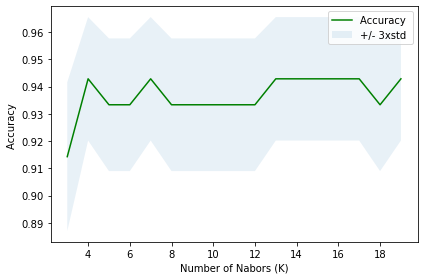

In [53]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(3,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('the max mean accuracy is ' + str(max(mean_acc)) )
plot_accuracy_plot(Ks,mean_acc,std_acc,'Number of Nabors (K)')

the max mean accuracy is 0.9428571428571428


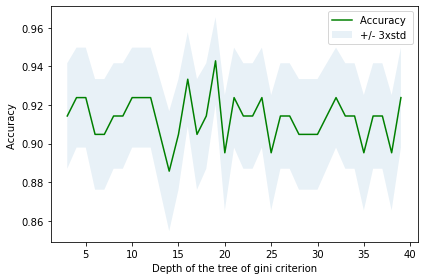

In [52]:
from sklearn.metrics import jaccard_score , classification_report , f1_score , confusion_matrix
#checking for gini criterion
depth_max=40
mean_acc = np.zeros((depth_max-1))
std_acc = np.zeros((depth_max-1))

for depth in range(3,depth_max):
    Tree = DecisionTreeClassifier(criterion="gini", max_depth = depth).fit(X_train,y_train)
    yhat=Tree.predict(X_test)
    mean_acc[depth-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[depth-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print('the max mean accuracy is ' + str(max(mean_acc)) )
plot_accuracy_plot(depth_max,mean_acc,std_acc,'Depth of the tree of gini criterion')

the max mean accuracy is 0.9238095238095239


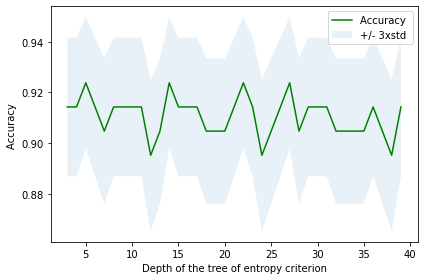

In [51]:
from sklearn.metrics import jaccard_score , classification_report , f1_score , confusion_matrix
#checking for gini criterion
depth_max=40
mean_acc = np.zeros((depth_max-1))
std_acc = np.zeros((depth_max-1))

for depth in range(3,depth_max):
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = depth).fit(X_train,y_train)
    yhat=Tree.predict(X_test)
    mean_acc[depth-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[depth-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
print('the max mean accuracy is ' + str(max(mean_acc)) )
plot_accuracy_plot(depth_max,mean_acc,std_acc,'Depth of the tree of entropy criterion')

In [55]:
from sklearn.tree import plot_tree

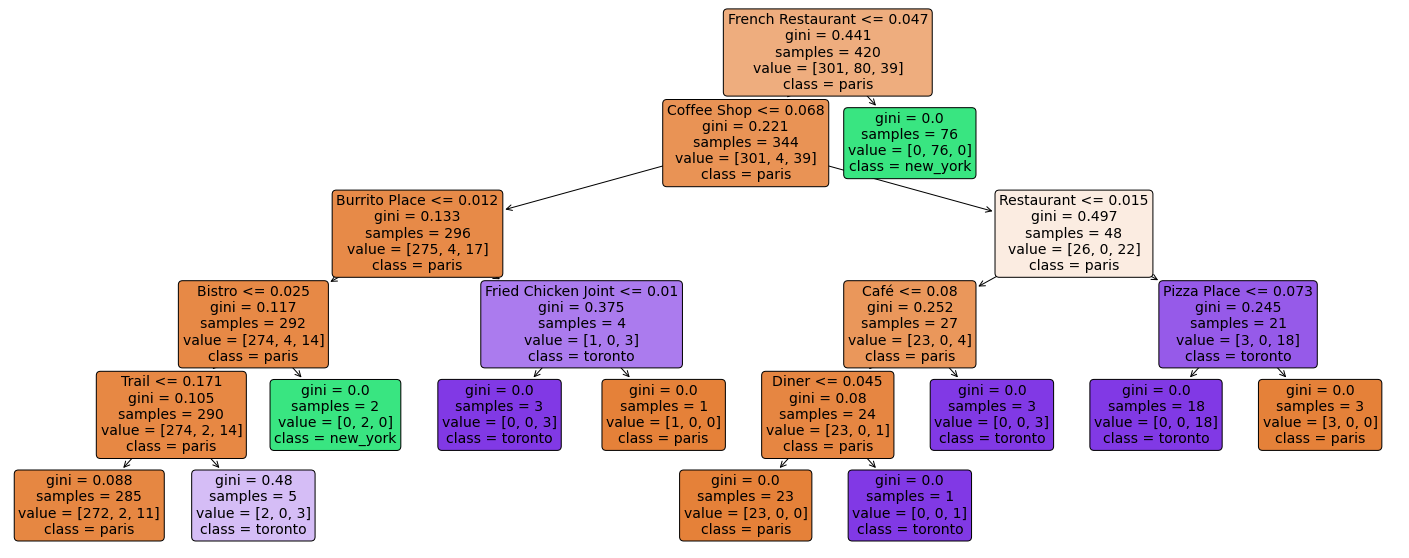

In [55]:
clf = DecisionTreeClassifier(max_depth=5) #max_depth is maximum number of levels in the tree
clf.fit(X,y)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=y.unique(), 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Conclusion

After lunching differents algorithm on our Data we've decided to keep it on KNN. Because it has the best accuracy

In [59]:
k = 16
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array(['new_york', 'paris', 'new_york', 'new_york', 'new_york'],
      dtype=object)

In [60]:
data=pd.DataFrame({'real_data':y_test,'predicted_data':yhat})
data=pd.DataFrame(data).join(finaldata[['Neighborhood']])
data[data['real_data']!=data['predicted_data']]
#data

,real_data,predicted_data,Neighborhood
383,toronto,new_york,Business reply mail Processing CentrE
47,paris,new_york,Parc-de-Montsouris
408,toronto,new_york,Roselawn
403,toronto,new_york,"Parkdale , Roncesvalles"
206,new_york,toronto,Heartland Village
417,toronto,new_york,"The Danforth West , Riverdale"


This method can be used for differents goals 
* we can predict the city based on the avenues 
* the error of prediction can give us idea about how similar an avenue to others from in another city

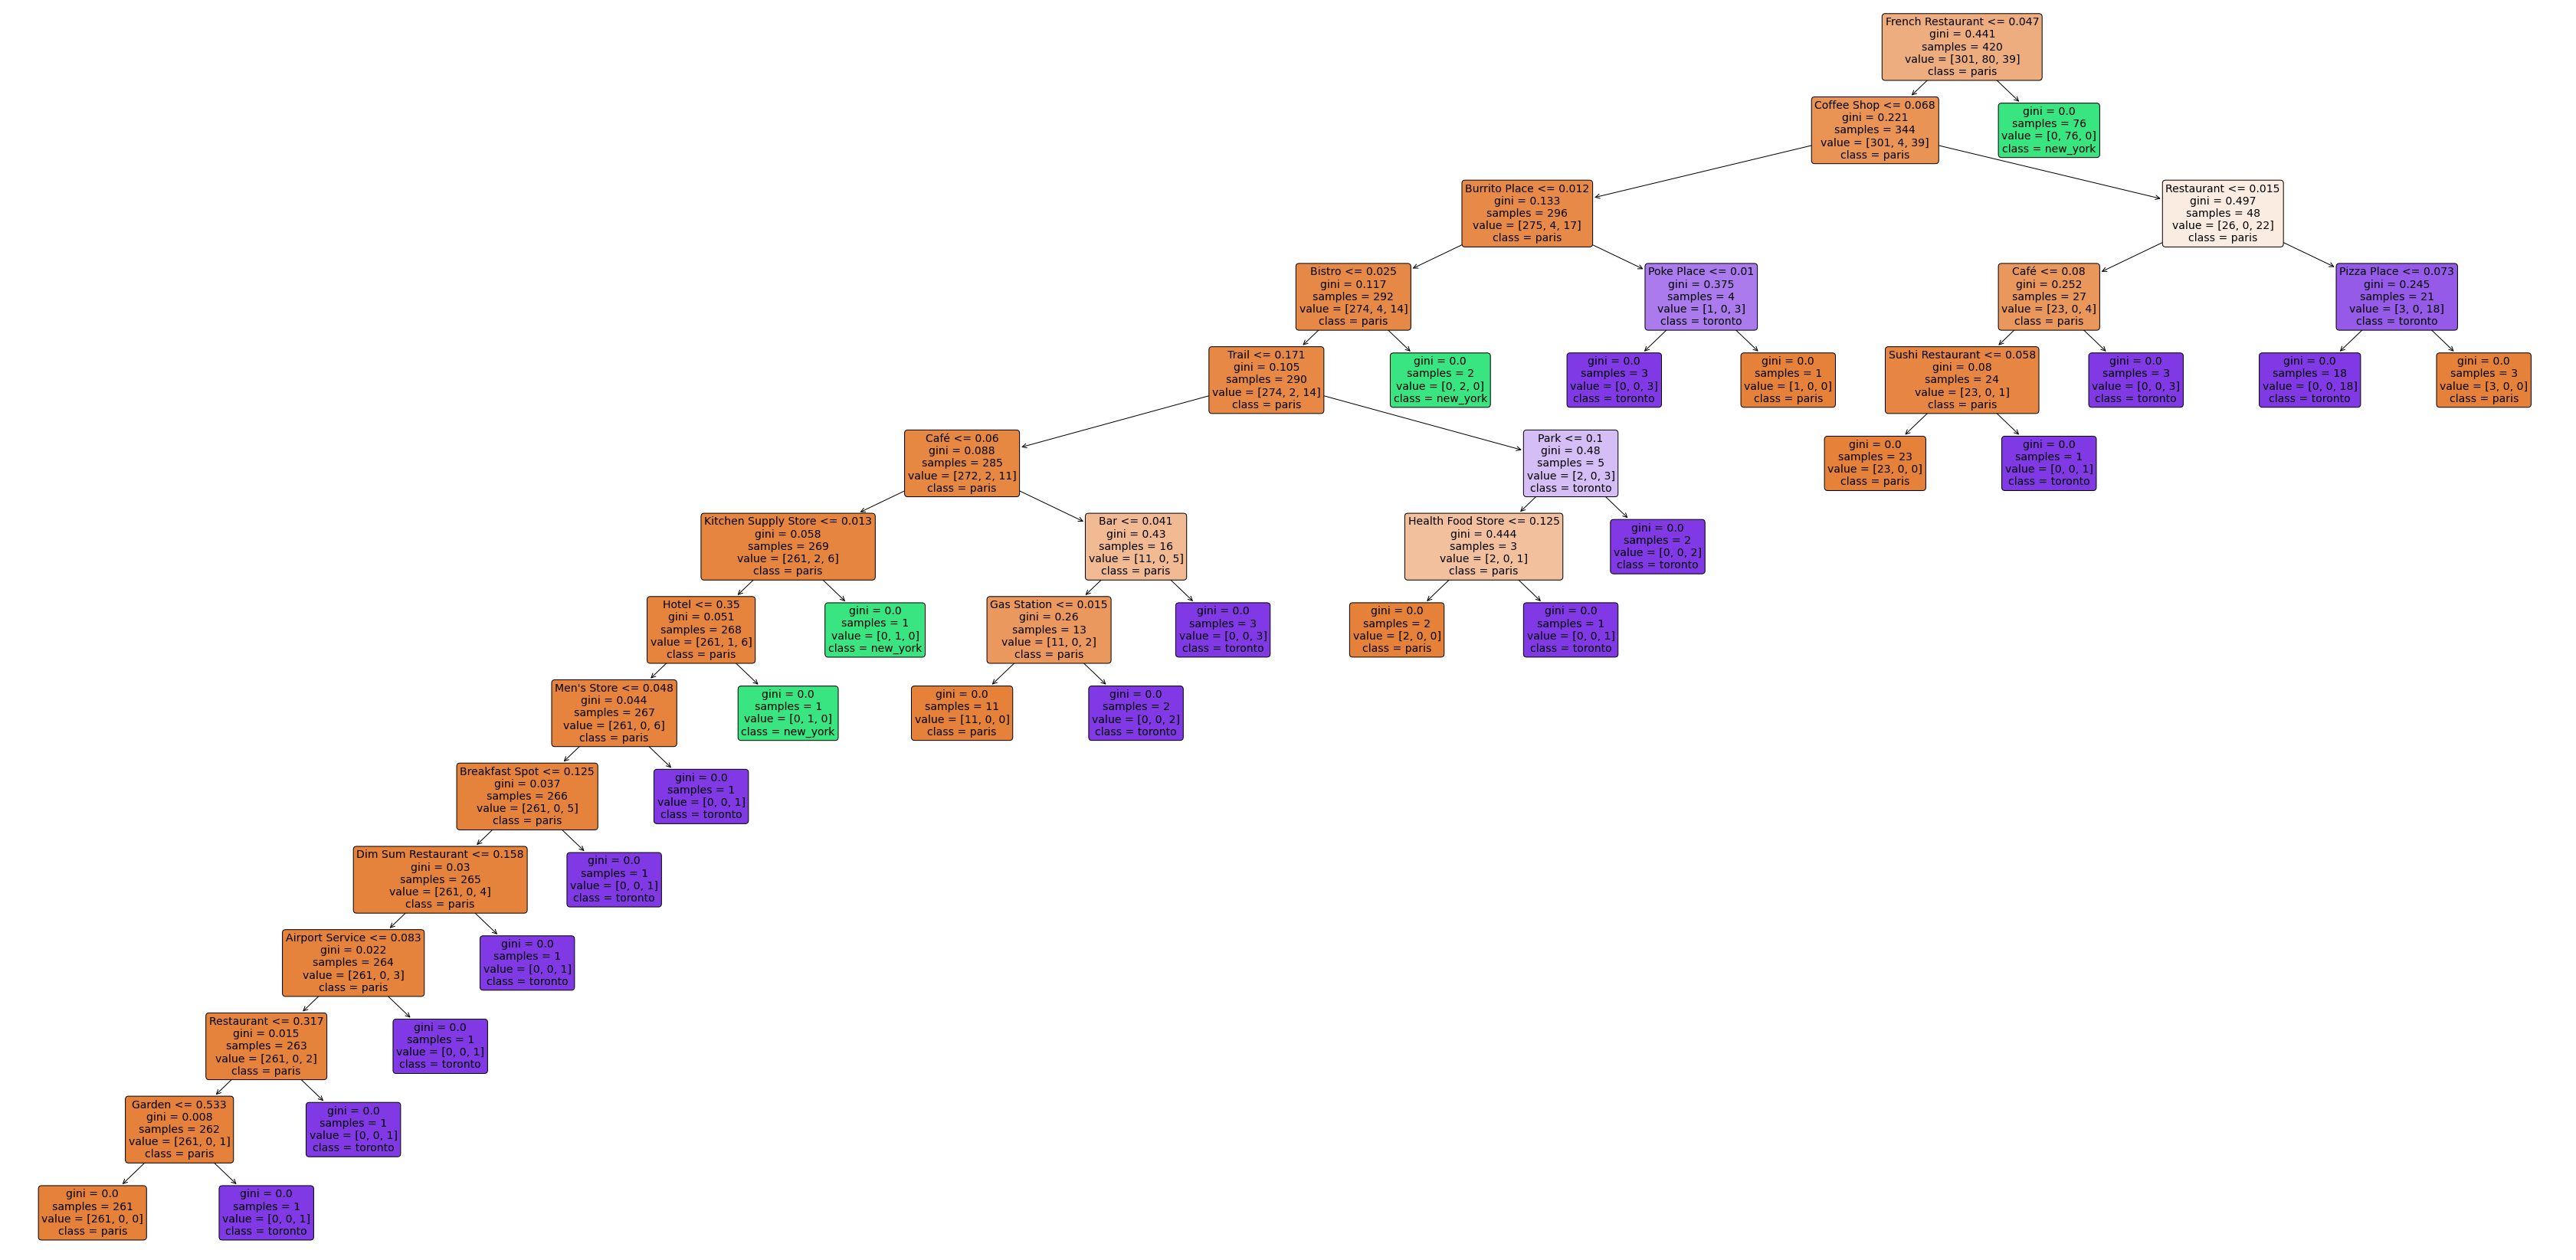

In [58]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=19) #max_depth is maximum number of levels in the tree
clf.fit(X,y)
plt.figure(figsize=(60,30))
a = plot_tree(clf, 
              feature_names=X.columns, 
              class_names=y.unique(), 
              filled=True, 
              rounded=True, 
              fontsize=14)

From this Tree we can understand more how we can make a neighborhood similar to one in a country.
If this method used with many cities we can go further and why not make a cities that have neighborhood that would make you feel like if you're living in another one.